In [1]:
train_df.dtypes
train_df.unique()

NameError: name 'train_df' is not defined

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
import lightgbm as lgbm

train_df = pd.read_csv('playground-series-s4e6/train.csv')

print(list(train_df.columns))

['id', 'Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP', 'Target']


In [5]:
train_df.describe()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,...,76518.00000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000
mean,38258.500000,1.111934,16.054419,1.644410,9001.286377,0.915314,3.658760,132.378766,1.226600,19.837633,...,0.05796,0.137053,5.933414,7.234468,4.007201,9.626085,0.062443,11.520340,1.228218,-0.080921
std,22088.988286,0.441669,16.682337,1.229645,1803.438531,0.278416,8.623774,10.995328,3.392183,15.399456,...,0.40849,0.933830,1.627182,3.503040,2.772956,5.546035,0.462107,2.653375,1.398816,2.251382
min,0.000000,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,19129.250000,1.000000,1.000000,1.000000,9119.000000,1.000000,1.000000,125.000000,1.000000,1.000000,...,0.00000,0.000000,5.000000,6.000000,1.000000,10.000000,0.000000,9.400000,0.300000,-1.700000
50%,38258.500000,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,...,0.00000,0.000000,6.000000,7.000000,5.000000,12.142857,0.000000,11.100000,1.400000,0.320000
75%,57387.750000,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,140.000000,1.000000,37.000000,...,0.00000,0.000000,6.000000,9.000000,6.000000,13.244048,0.000000,12.700000,2.600000,1.790000
max,76517.000000,6.000000,53.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,...,12.00000,19.000000,23.000000,33.000000,20.000000,18.000000,12.000000,16.200000,3.700000,3.510000


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
import lightgbm as lgbm

train_df = pd.read_csv('playground-series-s4e6/train.csv')

train_split = .8

train_df = pd.get_dummies(train_df, columns=['Target'], dtype=int)

print(list(train_df.columns))

total_missing_values = train_df.isnull().sum().sum()

print(total_missing_values)

train_df = pd.get_dummies(train_df, columns=['Marital status'], dtype=int)

print(train_df['Curricular units 1st sem (credited)'].unique())

scalable_cols = list(train_df.select_dtypes(include=['float64']).columns)
print(scalable_cols)

scaler = MinMaxScaler()
train_df[scalable_cols] = scaler.fit_transform(train_df[scalable_cols])

train_df['sem12_credited'] = (
    train_df['Curricular units 1st sem (credited)']
    +
    train_df['Curricular units 2nd sem (credited)']
)
train_df['sem12_credited_mean'] = train_df['sem12_credited'].apply(lambda x: x/2)

train_df['sem12_enrolled'] = (
    train_df['Curricular units 1st sem (enrolled)']
    +
    train_df['Curricular units 2nd sem (enrolled)']
)
train_df['sem12_enrolled_mean'] = train_df['sem12_enrolled'].apply(lambda x: x/2)

train_df['sem12_eval'] = (
    train_df['Curricular units 1st sem (evaluations)']
    +
    train_df['Curricular units 2nd sem (evaluations)']
)
train_df['sem12_eval_mean'] = train_df['sem12_eval'].apply(lambda x: x/2)

train_df['sem12_wo_eval'] = (
    train_df['Curricular units 1st sem (without evaluations)']
    +
    train_df['Curricular units 2nd sem (without evaluations)']
)
train_df['sem12_wo_eval_mean'] = train_df['sem12_wo_eval'].apply(lambda x: x/2)

train_df['sem12_approved'] = (
    train_df['Curricular units 1st sem (approved)']
    +
    train_df['Curricular units 2nd sem (approved)']
)
train_df['sem12_approved_mean'] = train_df['sem12_approved'].apply(lambda x: x/2)

train_df['sem12_grade'] = (
    train_df['Curricular units 1st sem (grade)']
    +
    train_df['Curricular units 2nd sem (grade)']
)
train_df['sem12_grade_mean'] = train_df['sem12_grade'].apply(lambda x: x/2)

train_df = train_df.drop(['Nacionality',
                          'Educational special needs',
                          'International',
                          'Curricular units 1st sem (credited)',
                          'Curricular units 2nd sem (credited)',
                          'Curricular units 1st sem (enrolled)',
                          'Curricular units 2nd sem (enrolled)',
                          'Curricular units 1st sem (evaluations)',
                          'Curricular units 2nd sem (evaluations)',
                          'Curricular units 1st sem (without evaluations)',
                          'Curricular units 2nd sem (without evaluations)'
                          ], axis=1)

['id', 'Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP', 'Target_Dropout',

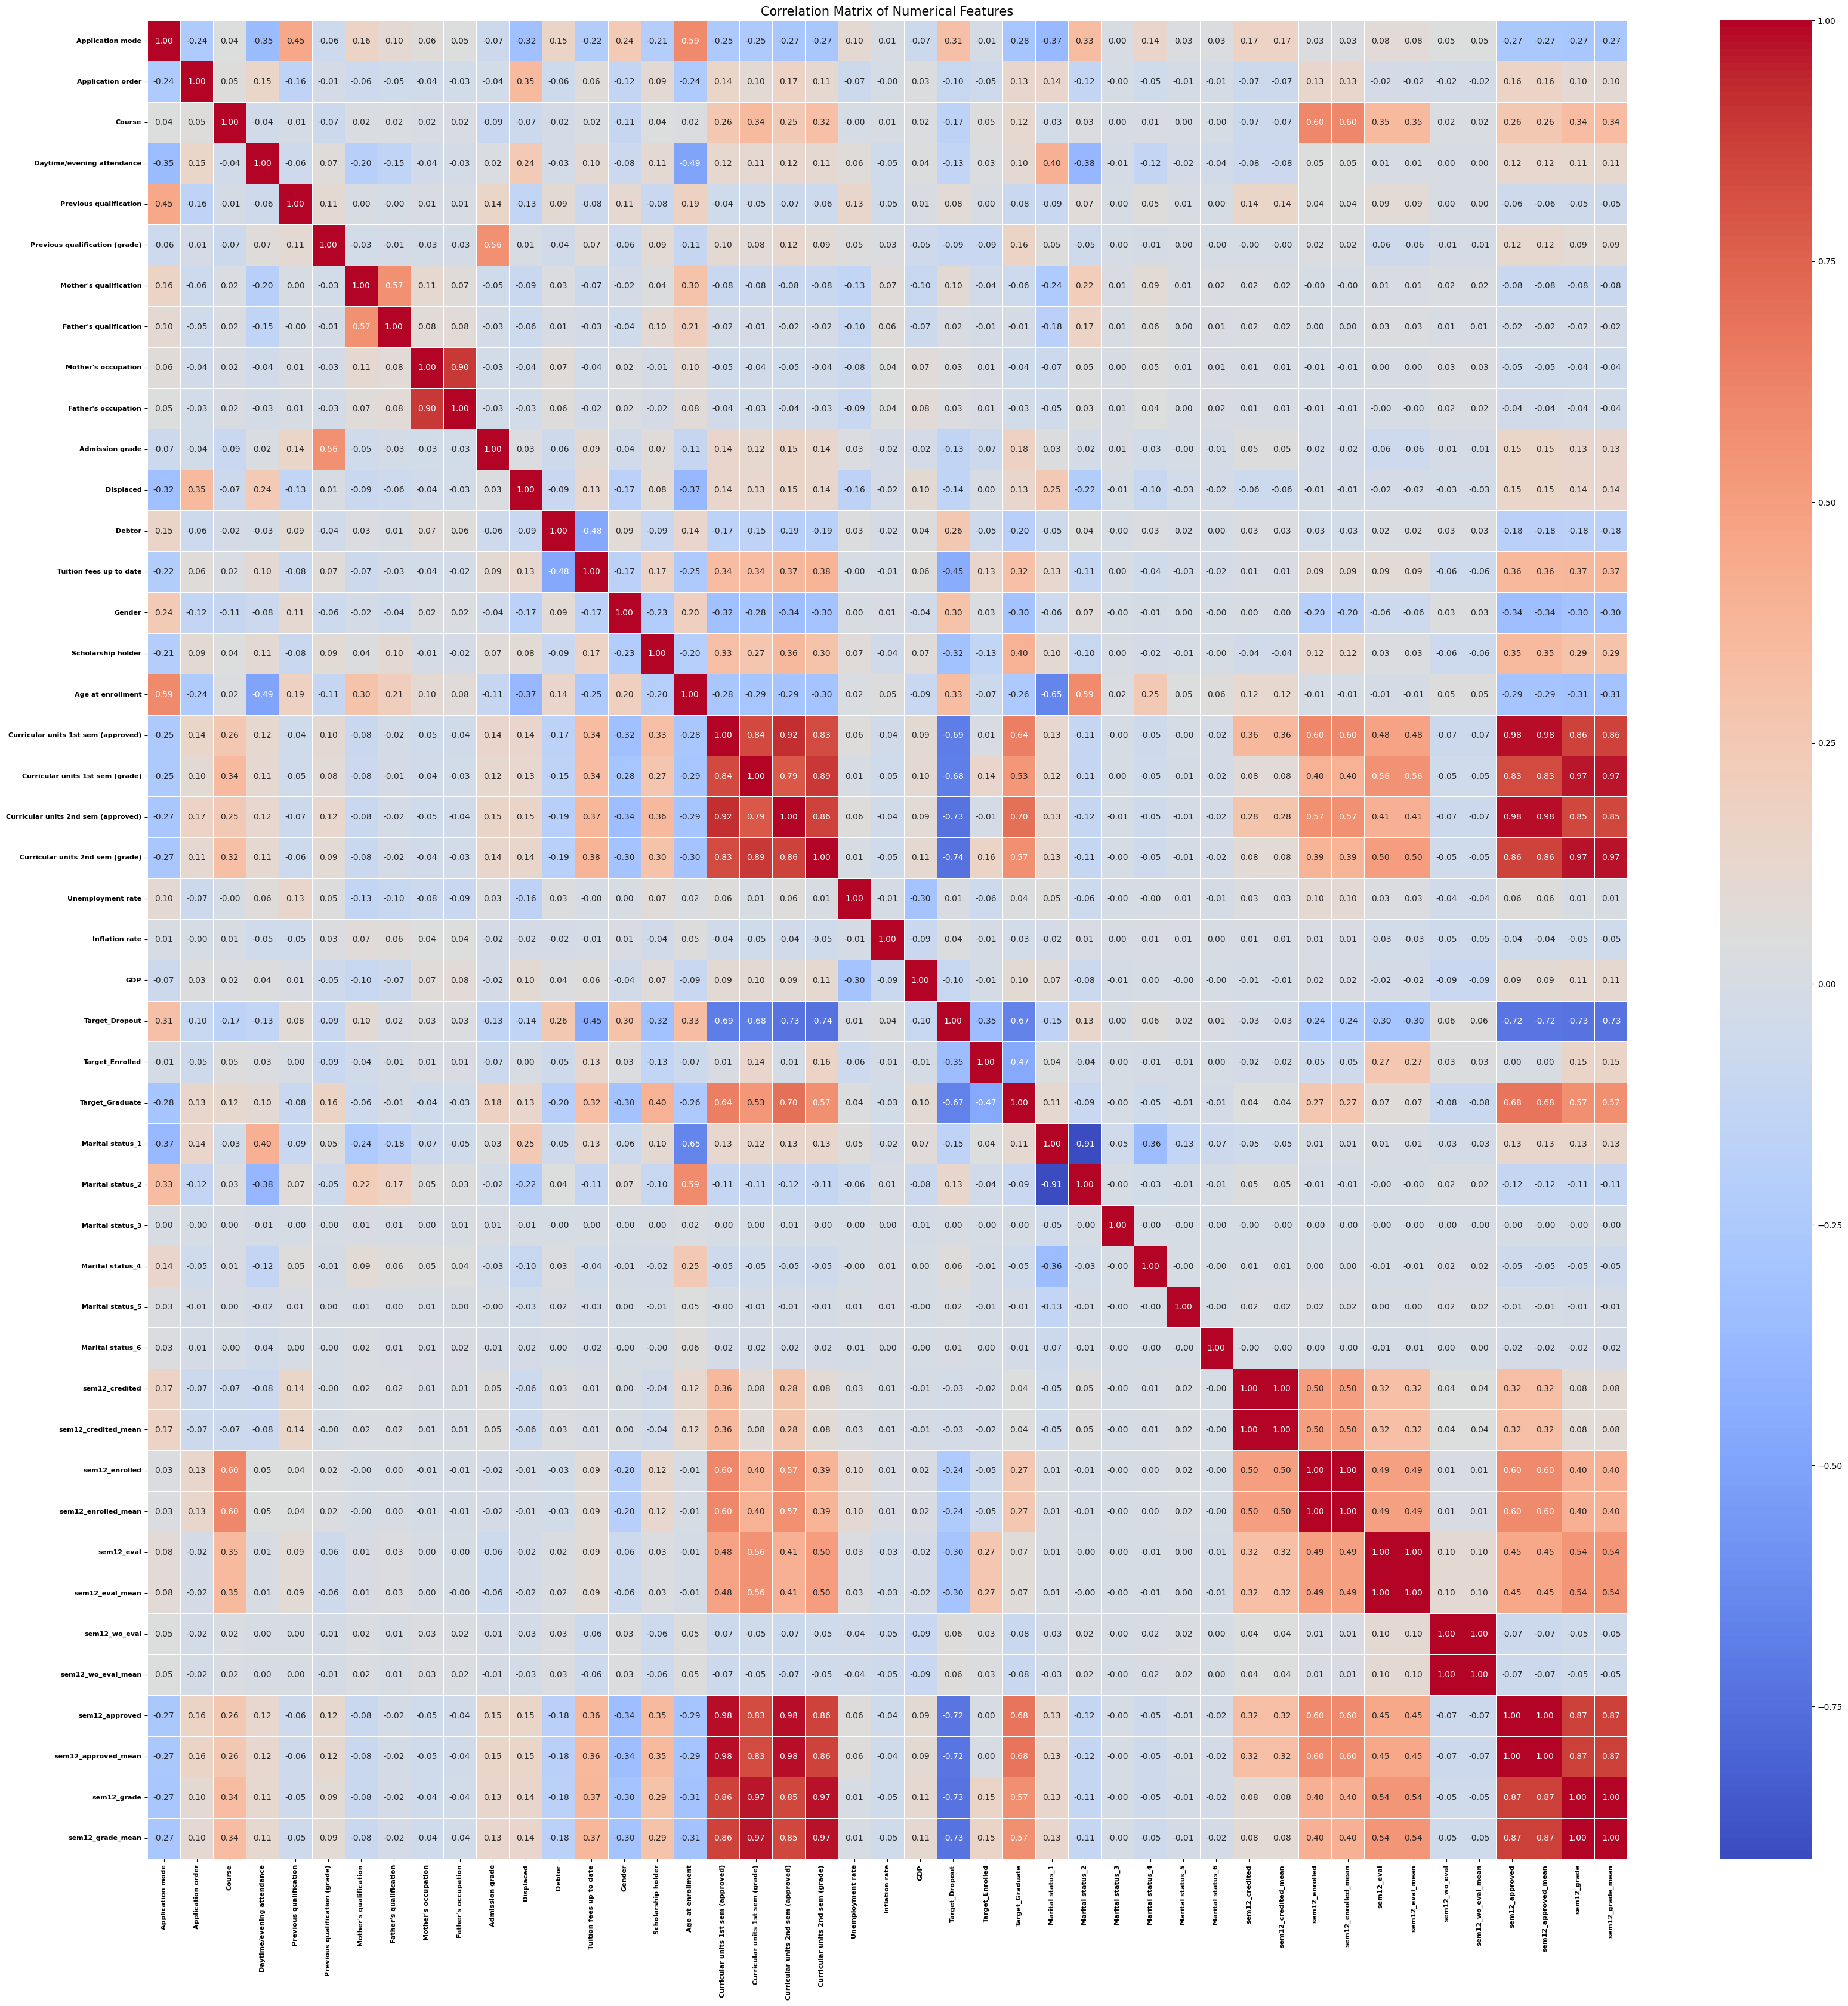

In [34]:
import matplotlib.pyplot as plt
import seaborn as sb

corr_matrix = train_df.drop('id', axis=1).corr()

plt.figure(figsize=(40, 40))
sb.heatmap(corr_matrix, linewidths=.5, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Matrix of Numerical Features', fontsize=15)
plt.xticks(fontsize=8, fontweight='bold')
plt.yticks(fontsize=8, fontweight='bold')
plt.show()